**In this project, I would be performing an exploratory data analysis on a dataset of movies.**

The dataset is can be found on kaggle (https://bit.ly/3QaG1gJ)

I will be answering the following questions: 


I. Who are the actors with the most number of appearances in movies over the years


II. How did the amount of produced films change over time?


III. Which Month had the highest number of releases over the years?


IV. What is the most & least popular movie?


V. What are the most profitable movies and least profitable movies?


VI. What are the correlations between revenue, popularity, profit & budget?

In [163]:
#loading necessary libraries

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
# Loading and Reading the Data

url='https://raw.githubusercontent.com/stanleyokali/files/main/movie_data.csv'
df = pd.read_csv(url)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [165]:
#Checking the number of columns and rows in the dataset

print(df.shape)

(10866, 21)


In [166]:
# Lets find out the name of the columns in the dataset.

print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [167]:
# Lets find out the datatype on each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [168]:
#Checking the new number of columns
df.shape

(10866, 21)

In [169]:


df.head(10)

## Here it is presented the first 10 rows of the dataset
## There are id columns as a unique value corresponding to each row - entry, which on its side represents each movie. 
## There are other columns which describes finances such budget and revenue. 
## Other columns include the genre, the production companies and the release_date

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

In [170]:
# dropping columns that are not needed for this analysis 

df.drop(['imdb_id', 'tagline', 'keywords', 'overview', 'homepage'], axis =1, inplace = True)

In [171]:
#Checking the new number of columns
df.shape

(10866, 16)

In [172]:
#removing nan values from cast column, keeping only movies, that has casted actors
#also removing rows where revenue_adj and budget_adj is equal to zero

df = df[df["cast"].isnull() == False]
df = df[df["genres"].isnull() == False]

df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [173]:
#Checking revenue, budget and runtime column rows for Zero values
zero_values= df.query('revenue==0 or budget == 0 or runtime ==0 or budget_adj ==0 or revenue_adj ==0').head()
zero_values.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [174]:
#Checking for null values
df.isna().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                 True
runtime                 False
genres                  False
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [175]:
#total null values in each column in the dataset
df.isna().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 1
runtime                  0
genres                   0
production_companies    44
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [176]:
#Drop null values
df.dropna(inplace = True)

#check for any null left
df.isna().sum().sum()

0

In [177]:
#Checking for duplicates
sum(df.duplicated())

1

In [178]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [179]:
#checking new dataframe shape
df.shape

(3805, 16)

In [180]:
#Changing format of release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [181]:
#check the new release_date format
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08


In [182]:
#descriptive statistics

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


## Question I

Who are the actors with the most number of appearance in movies over the years

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


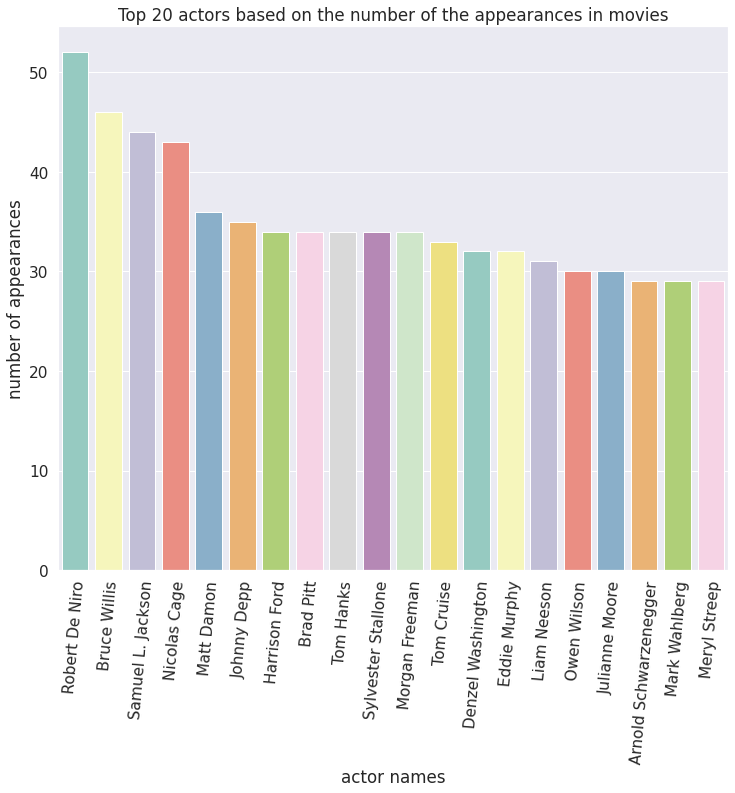

In [183]:


#1: actors with the most appearances in films

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

######
#Creating a dict for the cast, and how many times each actor casted for movies
######
actor_dict = {}

actors = df["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()

In [184]:
#creating new dataframes to hold the separated columns
df_c = (df['cast'].str.split('|', expand= True).rename(columns= lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand= True).rename(columns= lambda x: f"director_{x+1}"))
df_g = (df['genres'].str.split('|', expand= True).rename(columns= lambda x: f"genres{x+1}"))
df_p = (df['production_companies'].str.split('|', expand= True).rename(columns= lambda x: f"production_companies{x+1}"))

df_c.head(2)
df_p.head(2)

,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None


In [185]:
#joining the dataframes back to original dataset
df = df.join([df_c, df_d, df_g, df_p]) 

In [186]:
#droping the original columns that were separated
df = df.drop(['cast', 'director', 'genres', 'production_companies'],axis = 1)

In [187]:
#joining all the separated columns into a single column and dropping the nan values

df['casts'] = df[df.columns[12:17]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['directors'] = df[df.columns[17:29]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['genres'] = df[df.columns[29:34]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['production_companies'] = df[df.columns[34:39]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
#dropping the multiple columns
df.drop(df.iloc[:, 12:39],inplace= True,  axis = 1)
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda..."


In [188]:
#copying the dataframe into a new one df2
df2=df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3805 non-null   int64         
 1   popularity            3805 non-null   float64       
 2   budget                3805 non-null   int64         
 3   revenue               3805 non-null   int64         
 4   original_title        3805 non-null   object        
 5   runtime               3805 non-null   int64         
 6   release_date          3805 non-null   datetime64[ns]
 7   vote_count            3805 non-null   int64         
 8   vote_average          3805 non-null   float64       
 9   release_year          3805 non-null   int64         
 10  budget_adj            3805 non-null   float64       
 11  revenue_adj           3805 non-null   float64       
 12  casts                 3805 non-null   object        
 13  directors        

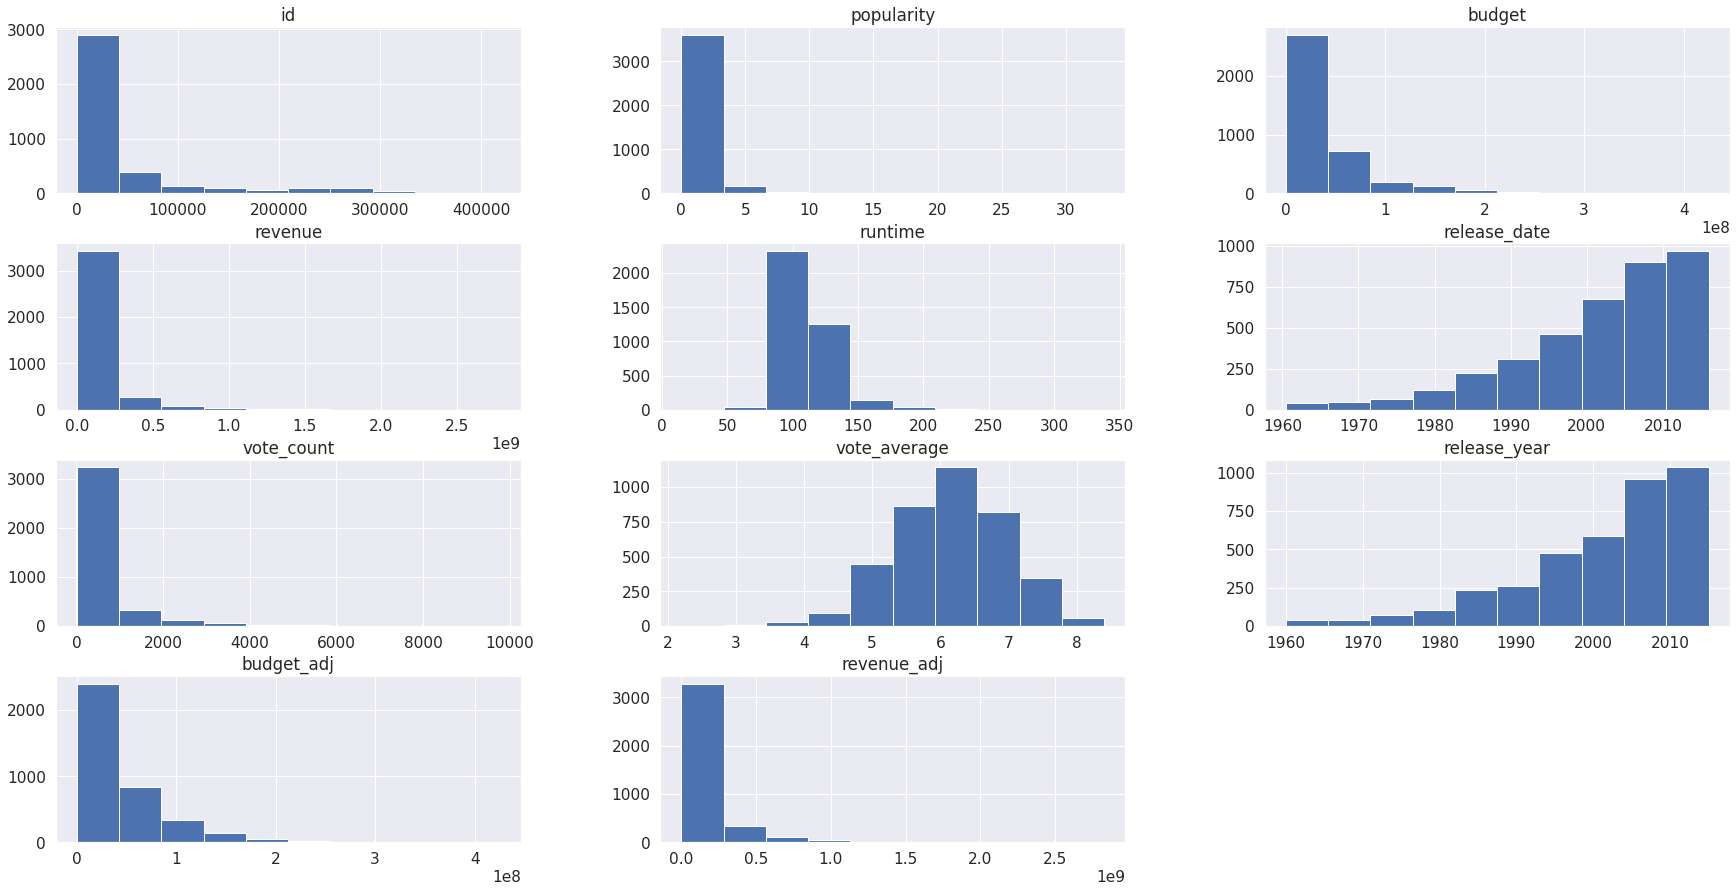

In [189]:
#viewing the distribution of some of the columns using a histogram

df2.hist(figsize=(30,15));

# Question II 

**How did the amount of produced films changed over time**







In [190]:
#movies produced by grouping by release year

movies_year = df2.groupby('release_year').id.count()
movies_year

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     47
1987     46
1988     56
1989     51
1990     52
1991     50
1992     53
1993     72
1994     61
1995     79
1996     84
1997     90
1998     90
1999    116
2000    104
2001    118
2002    125
2003    121
2004    142
2005    159
2006    168
2007    159
2008    161
2009    170
2010    177
2011    196
2012    157
2013    179
2014    165
2015    160
Name: id, dtype: int64

# Question III

**Which Month had the highest number of releases over the years**

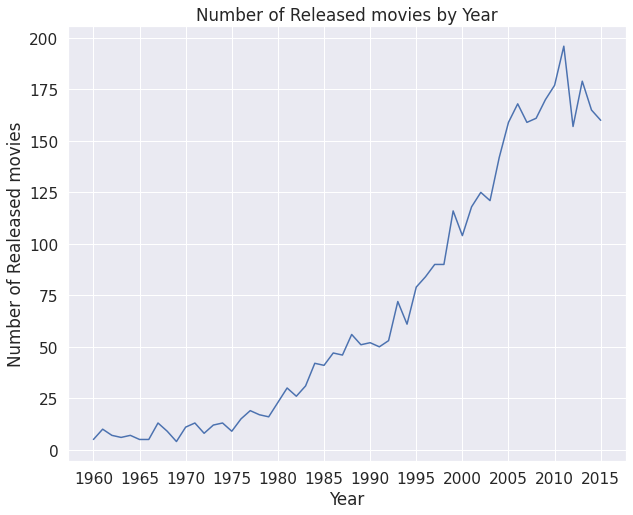

In [191]:
#Using a line graph to show how the number of movies has changed over the years.

movies_year.plot(kind = 'line', figsize= (10,8),xticks = np.arange(1960,2016,5))

#setting graph labels
plt.title('Number of Released movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Realeased movies');

In [192]:
#Creating a new column "month" from the released date

df2['month'] = df2['release_date'].dt.month_name()
df2.head(2)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies,month
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",June
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",May


In [193]:
# using groupby to group number of movies by month
df_month = df2.groupby('month').id.count()

#creating a new data frame to hold the months and count of movies
df_month =pd.DataFrame(df_month)
#resetting to include index
df_month = df_month.reset_index()
df_month

,month,id
0,April,261
1,August,334
2,December,411
3,February,252
4,January,219
5,July,308
6,June,339
7,March,277
8,May,290
9,November,302


In [194]:
#To order the months categorically
sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df_month.index= pd.CategoricalIndex(df_month['month'], categories= sort_order, ordered= True )
df_month= df_month.sort_index()
df_month

,month,id
month,,
January,January,219
February,February,252
March,March,277
April,April,261
May,May,290
June,June,339
July,July,308
August,August,334
September,September,452


In [195]:
#Dropping index column
df_month=df_month.reset_index(drop= True)
df_month

,month,id
0,January,219
1,February,252
2,March,277
3,April,261
4,May,290
5,June,339
6,July,308
7,August,334
8,September,452
9,October,360


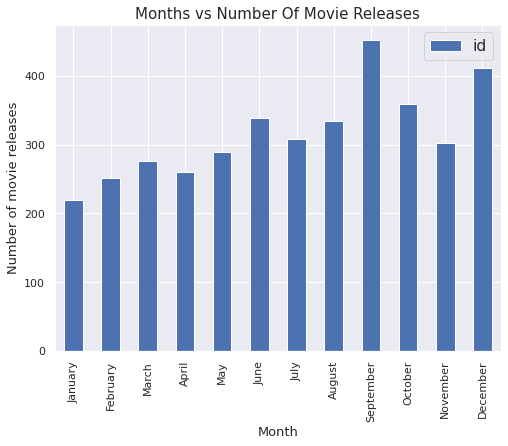

In [196]:
#plotting a bar chart to show months and the number of movies 

df_month.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#setting the labels and titles of the plot.

plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

# Question IV

**What is the most popular & least popular movie**


In [197]:
##defining a funct 'Minmax' using the functions 'idmin' and 'idmax' to find the index of lowest popularity and index of Highest popularity.
'''
    The function prints the row related to the index.
'''
def Minmax(x):
    #using function 'idmin' to find the index of lowest popularity.
    min_index = df2[x].idxmin()
    #using function 'idmax' to find the index of Highest popularity.
    max_index = df2[x].idxmax()
    maxi = pd.DataFrame(df2.loc[max_index,:])
    mini = pd.DataFrame(df2.loc[min_index,:])
    
    #print the movie with high and low popularity
    print("The movie with the highest "+ x + " : ",df2['original_title'][max_index])
    print("The movie with the lowest "+ x + "  : ",df2['original_title'][min_index])
    #return the rows and drop any row with NaN value
    return pd.concat([maxi,mini],axis = 1).dropna()
    

#call the Minmax function.
Minmax('popularity')

The movie with the highest popularity :  Jurassic World
The movie with the lowest popularity  :  Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´


,0,6065
id,135397,203793
popularity,32.985763,0.010335
budget,150000000,30000000
revenue,1513528810,68129518
original_title,Jurassic World,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
runtime,124,131
release_date,2015-06-09 00:00:00,2013-10-09 00:00:00
vote_count,5562,64
vote_average,6.5,5.5
release_year,2015,2013


**Question V. What are the most profitbale movies and least profitable movies?**

In [198]:
#adding a new column called profit
df2['profit']= df2['revenue'] - df2['budget']
df2.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies,month,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",June,1363528810


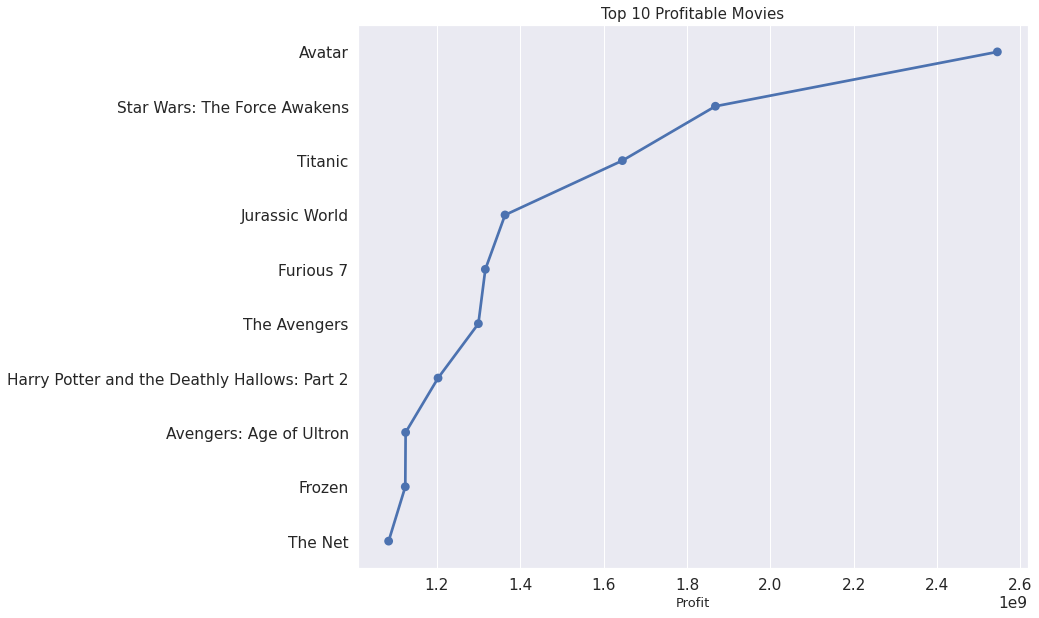

In [199]:
#making a plot to show top 10 most profitable movies.
#sorting the 'Profit' column in decending order and store it in a new dataframe,
profit_df = pd.DataFrame(df2['profit'].sort_values(ascending = False))

#creating new column 'original_title' in the new dataframe from the original dataframe
profit_df['original_title'] = df2['original_title']
x = list(map(str,(profit_df['original_title'])))
x = list(x[:10])
y = list(profit_df['profit'][:10])

#make a plot using pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(8,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13);

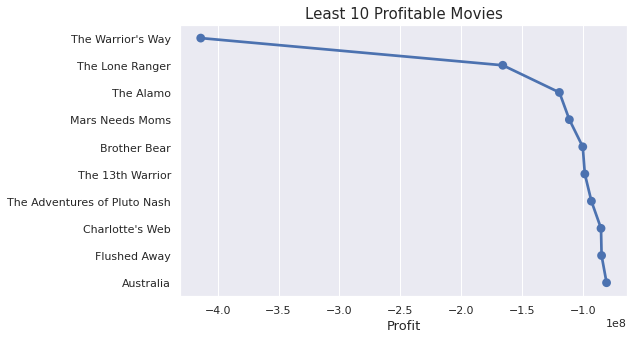

In [200]:
#make a plot which contain top 10 most profitable movies.
#sorting the 'Profit' column in ascending order and store it in a new dataframe,
profit_df = pd.DataFrame(df2['profit'].sort_values(ascending = True))

#creating new column 'original_title' in the new dataframe from the original dataframe
profit_df['original_title'] = df2['original_title']
x = list(map(str,(profit_df['original_title'])))
x = list(x[:10])
y = list(profit_df['profit'][:10])

#making a plot using pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(8,5)})

#setup the title and labels of the plot.
ax.set_title("Least 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13);

In [201]:
#using the previously defined Minmax function that pulls the minimum and maximum values to view information on the least and most profitable movie
Minmax('profit')

The movie with the highest profit :  Avatar
The movie with the lowest profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
runtime,162,100
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74
vote_average,7.1,6.4
release_year,2009,2010


# Question VI. What are the correlations between revenue, popularity, profit & budget?

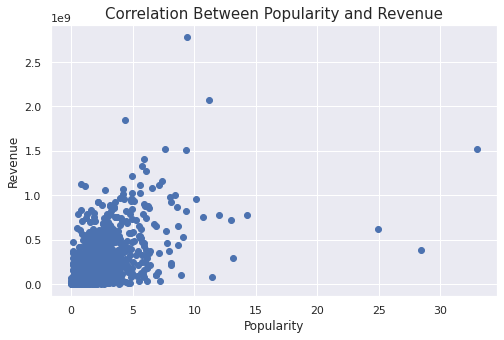

In [202]:
#using a scatter plot to show correlation between popularity and Revenue
x= df2['popularity']
y= df2['revenue']
plt.scatter(x,y);

# setting title labels and fontsize
plt.title('Correlation Between Popularity and Revenue', fontsize = 15)
plt.xlabel('Popularity', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12);

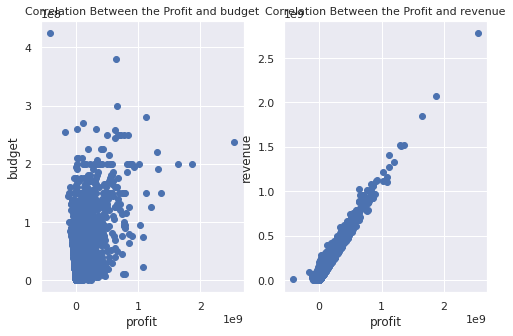

In [203]:
#using scatter plot to show correlation between the movie's profit, budget and revenue
w= df2['profit']
x= df2['budget']
y= df2['revenue']

fig = plt.figure()
#setting position of plots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(w,x)
ax2.scatter(w,y)

#setting titles, labels and fontsize
ax1.set_title('Correlation Between the Profit and budget', fontsize = 11)
ax1.set_xlabel('profit')
ax1.set_ylabel('budget')

ax2.set_title('Correlation Between the Profit and revenue', fontsize = 11)
ax2.set_xlabel('profit')
ax2.set_ylabel('revenue');

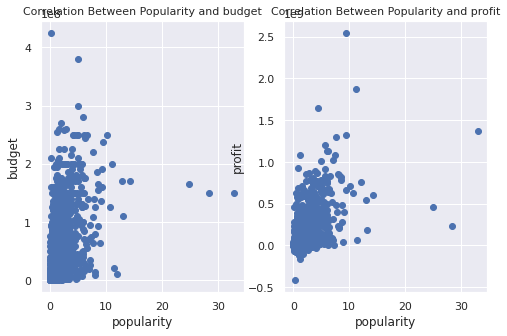

In [204]:
#using scatter plot to show correlation between the movie's popularity, budget and profit
w= df2['popularity']
x= df2['budget']
y= df2['profit']

#setting position of plots
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(w,x)
ax2.scatter(w,y)

#setting titles, labels and fontsize
ax1.set_title('Correlation Between Popularity and budget', fontsize = 11)
ax1.set_xlabel('popularity')
ax1.set_ylabel('budget')

ax2.set_title('Correlation Between Popularity and profit', fontsize = 11)
ax2.set_xlabel('popularity')
ax2.set_ylabel('profit');

#Conclusion
This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. There are many famous actors like Robert De Niro who casted in many films all over these years.